In [71]:
import torch
import torch.nn as nn

import torch.nn.functional as F
import torch.optim as optim

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression, load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import numpy as np

plt.rcParams["figure.figsize"] = (15, 6)
sns.set_style('darkgrid')

# Linear regression

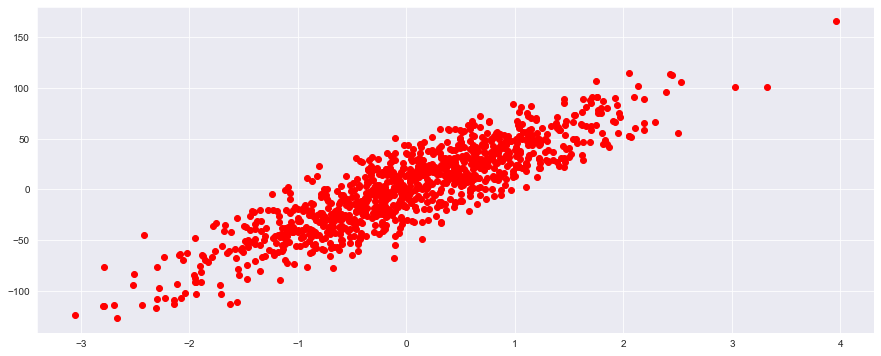

In [2]:
# Initial setup
X, y, coef = make_regression(n_samples = 1000, n_features = 1, noise = 20, coef = True, random_state = 1)
n_samples, n_features = X.shape

X_tensor = torch.from_numpy(X.astype(np.float32))
y_tensor = torch.from_numpy(y.astype(np.float32))
y_tensor = y_tensor.view(n_samples, 1)

_ = plt.plot(X, y, 'ro')

In [3]:
class LinearRegression(nn.Module):
    
    def __init__(self, n_features):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(n_features, 1)
        
    def forward(self, x):
        return self.linear(x)

#### Training process

In [4]:
# Define model
linear_regression = LinearRegression(n_features)

# Define loss and optimizer
learning_rate = 0.1
loss = nn.MSELoss()
optimizer = optim.SGD(linear_regression.parameters(), lr=learning_rate)

# Define training process
n_epochs = 20
for epoch in range(n_epochs + 1):
    
    output = linear_regression(X_tensor)
    running_loss = loss(output, y_tensor)
    
    running_loss.backward()
    
    optimizer.step()
    optimizer.zero_grad()
    
    params = list(linear_regression.parameters())
    w = params[0].item()
    b = params[1].item()
    
    if epoch % 10 == 0:
        print(f"Epoch {epoch+1}: loss = {running_loss.item()}") #, inferred model = {w} * X + {b}")

Epoch 1: loss = 1828.6912841796875
Epoch 11: loss = 421.2362976074219
Epoch 21: loss = 401.8661193847656


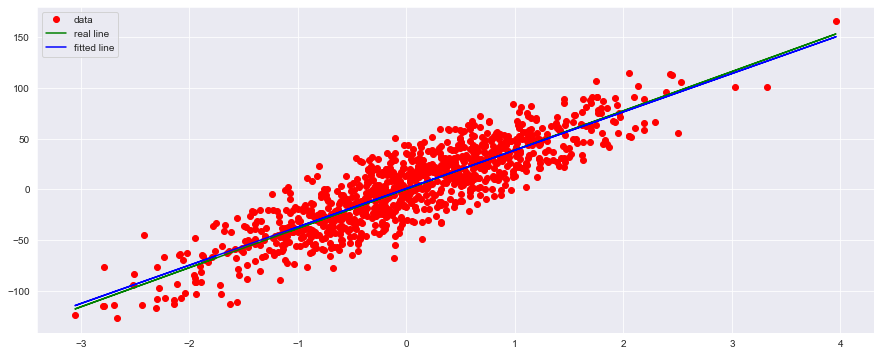

In [5]:
plt.plot(X, y, 'ro', label = "data")
plt.plot(X, coef*X, 'g', label = "real line")
plt.plot(X, w*X + b, 'b', label = "fitted line")
plt.legend()
plt.show()

# Logistic regression

In [59]:
# Load data and split to train / test
X, y = load_breast_cancer(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 0)

# Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Get tensors
n_samples, n_features = X_train.shape

X_train = torch.from_numpy(X_train.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32)).view(len(y_train), 1)

X_test = torch.from_numpy(X_test.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32)).view(len(y_test), 1)

In [60]:
class LogisticRegression(nn.Module):
    
    def __init__(self, n_features):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(n_features, 1)
        
    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

Epoch 1: train loss = 1.1465080976486206, test loss = 1.0872716903686523
Epoch 101: train loss = 0.2633693218231201, test loss = 0.2975563108921051
Epoch 201: train loss = 0.18718168139457703, test loss = 0.2253735363483429


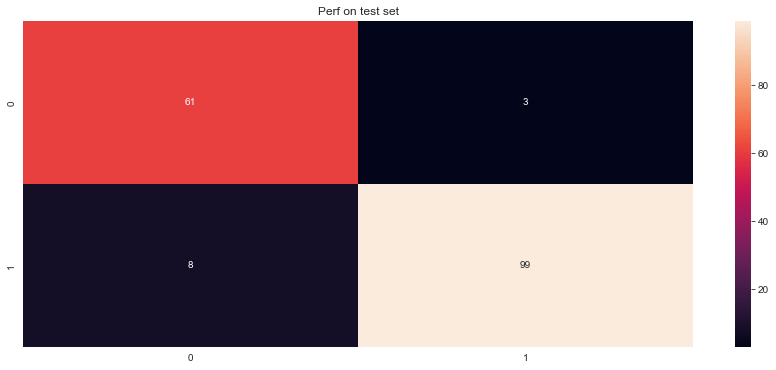

In [75]:
# Define model
log_regression = LogisticRegression(n_features)

# Define loss and optimizer
learning_rate = 0.01
loss = nn.BCELoss()
optimizer = optim.SGD(log_regression.parameters(), lr=learning_rate)

# Define training process
n_epochs = 200
for epoch in range(n_epochs + 1):
    
    output = log_regression(X_train)
    running_loss = loss(output, y_train)
    
    running_loss.backward()
    
    optimizer.step()
    optimizer.zero_grad()
   
    with torch.no_grad():
        test_output = log_regression(X_test)
        test_loss = loss(test_output, y_test)
        
    if epoch % 100 == 0:
        print(f"Epoch {epoch+1}: train loss = {running_loss.item()}, test loss = {test_loss.item()}") 
        
# Final accuracy
test_pred = test_output.round()
plt.title("Perf on test set")
_ = sns.heatmap(confusion_matrix(y_test, test_pred), annot = True, fmt = 'd')